# Download weather models

In [28]:
import cdsapi

c = cdsapi.Client()

# set the request parameters
request = {
    'product_type': 'reanalysis',
    "levtype": "{}".format('model_level'),
    'format': 'netcdf',
    'param': ['temperature', 'pressure', 'specific_humidity', 'relatibve_humidity', 'geopotential'],
    'year': '2022',
    'month': '01',
    'day': '01',
    'time': ['14:00'],
    'area': [35, -100, 25, -90],
    'grid': [0.25, 0.25],
}

# send the request to the CDS API and save the data to file
c.retrieve('reanalysis-era5-pressure-levels', request, 'ERA5_2022_0101.nc')


2023-04-12 19:50:29,764 INFO Welcome to the CDS
2023-04-12 19:50:29,765 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-04-12 19:50:29,925 INFO Request is queued
2023-04-12 19:50:31,070 INFO Request is running
2023-04-12 19:50:32,716 INFO Request is completed
2023-04-12 19:50:32,717 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data1/adaptor.mars.internal-1681347032.0678368-32087-17-777e4c53-0bb8-406f-b8fb-cff9a678b26e.nc to ERA5_2022_0101.nc (81.2K)
2023-04-12 19:50:33,854 INFO Download rate 71.5K/s


Result(content_length=83168,content_type=application/x-netcdf,location=https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data1/adaptor.mars.internal-1681347032.0678368-32087-17-777e4c53-0bb8-406f-b8fb-cff9a678b26e.nc)

Weather model are save as netCDF. When open / load the data, use xarray to view and observe the data.

In [29]:
import xarray as xr

# open the NetCDF file
data = xr.open_dataset('ERA5_2022_0101.nc')
data
# extract the temperature, pressure, and specific humidity variables
# temperature = data['t']
# pressure = data['sp']
# specific_humidity = data['q']

# print the variable information
# print(temperature)
# print(pressure)
# print(specific_humidity)

<xarray.Dataset>
Dimensions:    (longitude: 41, latitude: 41, level: 6, time: 1)
Coordinates:
  * longitude  (longitude) float32 -100.0 -99.75 -99.5 ... -90.5 -90.25 -90.0
  * latitude   (latitude) float32 35.0 34.75 34.5 34.25 ... 25.5 25.25 25.0
  * level      (level) int32 1000 850 700 500 400 300
  * time       (time) datetime64[ns] 2022-01-01T14:00:00
Data variables:
    t          (time, level, latitude, longitude) float32 ...
    q          (time, level, latitude, longitude) float32 ...
    r          (time, level, latitude, longitude) float32 ...
    z          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-04-13 00:50:32 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [34]:
data.z.values[0][0].shape

(41, 41)

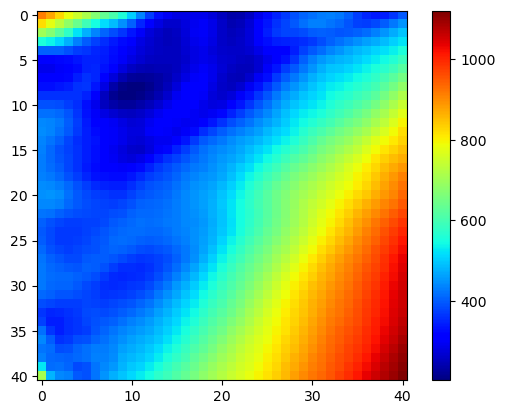

In [40]:
import matplotlib.pyplot as plt
plt.imshow(data.z.values[0][0], cmap='jet')
plt.colorbar()
plt.show()

In [24]:
import xarray as xr

# open the NetCDF file
data = xr.open_dataset('era5_temperature_sub_area.nc')
data

<xarray.Dataset>
Dimensions:    (longitude: 13, latitude: 11, level: 6, time: 1)
Coordinates:
  * longitude  (longitude) float32 -10.0 -9.0 -8.0 -7.0 ... -1.0 0.0 1.0 2.0
  * latitude   (latitude) float32 60.0 59.0 58.0 57.0 ... 53.0 52.0 51.0 50.0
  * level      (level) int32 1000 850 700 500 400 300
  * time       (time) datetime64[ns] 2008-01-01T12:00:00
Data variables:
    t          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-04-13 00:43:33 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...